**Import Dataset**

In [ ]:
import pandas as pd

# Load the dataset
from google.colab import drive
drive.mount('/content/drive/')

# Specify the path to your dataset file
file_path = '/content/drive/MyDrive/SocialMediaAnalyticsProject/covid19_tweets.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)
df

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


**Filter All Tweets from US Locations**

In [ ]:
import re

us_location_patterns = [
    #country
    'usa','us','america','united states of america',
    # States
    'alabama', 'alaska', 'arizona', 'arkansas', 'california', 'colorado', 'connecticut', 'delaware',
    'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana',
    'maine', 'maryland', 'massachusetts', 'michigan', 'minnesota', 'mississippi', 'missouri', 'montana',
    'nebraska', 'nevada', 'new hampshire', 'new jersey', 'new mexico', 'new york', 'north carolina', 'north dakota',
    'ohio', 'oklahoma', 'oregon', 'pennsylvania', 'rhode island', 'south carolina', 'south dakota', 'tennessee', 'texas',
    'utah', 'vermont', 'virginia', 'washington', 'west virginia', 'wisconsin', 'wyoming',

    # Major Cities
    'los angeles', 'san francisco', 'san diego', 'san jose', 'sacramento', 'long beach', 'oakland', 'santa ana', 'riverside', 'fresno',
    'chicago', 'houston', 'philadelphia', 'phoenix', 'san antonio', 'dallas', 'austin', 'fort worth', 'el paso', 'seattle',
    'boston', 'denver', 'washington dc', 'miami', 'atlanta', 'new orleans', 'nashville', 'portland', 'orlando', 'tampa',
    'detroit', 'pittsburgh', 'cleveland', 'minneapolis', 'st. louis', 'charlotte', 'indianapolis', 'columbus', 'jacksonville',

    # Common Abbreviations
    # 'usa', 'us', 'united states', 'america', 'u.s.', 'nyc', 'la', 'sf', 'dc', 'atl', 'mia', 'sea', 'dal', 'hou', 'phx', 'chi',
    # 'san', 'bos', 'pdx', 'atx', 'elp', 'okc', 'lv',

    # Additional Terms
    # 'brooklyn', 'queens', 'bronx', 'staten island', 'manhattan', 'silicon valley', 'bay area', 'central valley', 'gulf coast', 'east coast', 'west coast',
    # 'northeast', 'northwest', 'southeast', 'southwest', 'midwest', 'mountain states', 'sunshine state', 'golden state', 'keystone state',

    # Other Specific Locations
    # 'hawaii', 'aloha state', 'florida keys', 'outer banks', 'big apple', 'windy city', 'music city', 'mile high city', 'the city of brotherly love',
    # 'magic city', 'beantown', 'emerald city', 'space city', 'motor city', 'city of angels', 'city by the bay', 'the big easy', 'the 305', 'the 404',
    # 'the 214', 'the 713', 'the 602', 'the 312', 'the 215', 'the 305', 'the 404', 'the 214', 'the 713', 'the 602', 'the 312', 'the 215'
]

# Escape special characters in location patterns for regex
escaped_patterns = [re.escape(pattern.lower()) for pattern in us_location_patterns]

# Create the regex pattern for exact match
pattern = r'\b(?:{})\b'.format('|'.join(escaped_patterns))

# Filter tweets based on user_location containing exact US location patterns
us_tweets = df[df['user_location'].str.lower().str.contains(pattern, na=False)]

# Display the filtered tweets
us_tweets


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
19,Coronavirus Law,"Florida, USA",COVID-19 Practice of Lechner Law,2019-12-03 19:00:11,14,24,74,False,2020-07-25 12:26:39,COVID Update: The infection rate in Florida is...,NaN,Twitter for iPad,False
22,Micah Pollak,Northwest Indiana,Associate Professor of Economics (PhD in Econo...,2011-07-22 13:41:42,751,183,1308,False,2020-07-25 12:26:31,"@JimBnntt Your image doesn't list a source, bu...",NaN,Twitter Web App,False
32,Beautify Data,"Miami, FL",We beautify data to learn and gain insight fro...,2019-02-18 17:11:24,82,92,1152,False,2020-07-25 12:26:17,"An update on the total #covid19 cases, recover...","['covid19', 'Africa']",Twitter Web App,False
36,harleyb,Deep Heart Texas,Inquisitive; Open minded but clear-eyed; Unapo...,2014-02-03 01:23:36,6156,5463,193090,False,2020-07-25 12:26:06,@NicoleKowalski5 @chrisdameanor19 I'm feeling ...,['COVID19'],Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179080,CSIS Food Security,"Washington, DC",The @CSIS Global Food Security Program provide...,2012-06-18 16:10:56,16345,1671,2539,False,2020-08-29 19:45:07,Migrant workers are being hit hard by #COVID19...,['COVID19'],Hootsuite Inc.,False
179085,3D Innovations,"Honolulu, Hawaii","Providing Engineering/3D Design, 3D Printing, ...",2011-07-06 19:50:05,5776,3762,13554,False,2020-08-29 19:45:01,How toilet paper and avocados help explain the...,NaN,Sprout Social,False
179086,Mount Sinai Health System,"New York, NY",Integrated health care system providing except...,2009-07-07 18:58:14,86380,6846,5545,True,2020-08-29 19:45:01,Widened small blood vessels in the lungs appea...,['COVID19'],Falcon Social Media Management,False
179096,laura l. sweet,"Los Angeles, CA","Creative Director/AD/CW, Advertising & Brandin...",2008-03-18 16:45:55,2146,1077,5306,False,2020-08-29 19:44:40,We were really bummed we couldn’t cop one of t...,NaN,Instagram,False


**Remove Records if text or hashtags are empty.**

In [ ]:
# Remove rows where both 'text' and 'hashtags' columns are empty
us_tweets = us_tweets[~((us_tweets['text'] == '') | (us_tweets['hashtags'] == ''))]
us_tweets

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
19,Coronavirus Law,"Florida, USA",COVID-19 Practice of Lechner Law,2019-12-03 19:00:11,14,24,74,False,2020-07-25 12:26:39,COVID Update: The infection rate in Florida is...,NaN,Twitter for iPad,False
22,Micah Pollak,Northwest Indiana,Associate Professor of Economics (PhD in Econo...,2011-07-22 13:41:42,751,183,1308,False,2020-07-25 12:26:31,"@JimBnntt Your image doesn't list a source, bu...",NaN,Twitter Web App,False
32,Beautify Data,"Miami, FL",We beautify data to learn and gain insight fro...,2019-02-18 17:11:24,82,92,1152,False,2020-07-25 12:26:17,"An update on the total #covid19 cases, recover...","['covid19', 'Africa']",Twitter Web App,False
36,harleyb,Deep Heart Texas,Inquisitive; Open minded but clear-eyed; Unapo...,2014-02-03 01:23:36,6156,5463,193090,False,2020-07-25 12:26:06,@NicoleKowalski5 @chrisdameanor19 I'm feeling ...,['COVID19'],Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179080,CSIS Food Security,"Washington, DC",The @CSIS Global Food Security Program provide...,2012-06-18 16:10:56,16345,1671,2539,False,2020-08-29 19:45:07,Migrant workers are being hit hard by #COVID19...,['COVID19'],Hootsuite Inc.,False
179085,3D Innovations,"Honolulu, Hawaii","Providing Engineering/3D Design, 3D Printing, ...",2011-07-06 19:50:05,5776,3762,13554,False,2020-08-29 19:45:01,How toilet paper and avocados help explain the...,NaN,Sprout Social,False
179086,Mount Sinai Health System,"New York, NY",Integrated health care system providing except...,2009-07-07 18:58:14,86380,6846,5545,True,2020-08-29 19:45:01,Widened small blood vessels in the lungs appea...,['COVID19'],Falcon Social Media Management,False
179096,laura l. sweet,"Los Angeles, CA","Creative Director/AD/CW, Advertising & Brandin...",2008-03-18 16:45:55,2146,1077,5306,False,2020-08-29 19:44:40,We were really bummed we couldn’t cop one of t...,NaN,Instagram,False


**Top 10 Most Used Hashtags in the US on Twitter**

In [ ]:
# Function to extract hashtags from text
def extract_hashtags(text):
    hashtags = []
    words = text.split()
    for word in words:
        if word.startswith('#'):
            hashtags.append(word.lower())  # Convert hashtags to lowercase for consistency
    return hashtags

# Apply the function to extract hashtags
us_tweets['hashtags'] = us_tweets['text'].apply(extract_hashtags)

# Flatten the list of hashtags
all_hashtags = [hashtag for sublist in us_tweets['hashtags'] for hashtag in sublist]

# Count the occurrences of each hashtag
hashtag_counts = pd.Series(all_hashtags).value_counts()

# Print the top 10 most used hashtags
print("Top 10 Most Used Hashtags:")
print(hashtag_counts.head(10))

Top 10 Most Used Hashtags:
#covid19        13907
#coronavirus     1327
#covid19.         848
#covid19,         551
#covid19…         539
#pandemic         276
#covid19?         231
#trump            224
#wearamask        157
#covid            157
Name: count, dtype: int64


**Filter tweets with hashtag 'covid19'**

In [ ]:
# Filter tweets with hashtag 'covid19'
covid19_tweets = us_tweets[us_tweets['text'].str.lower().str.contains('#covid19')]
covid19_tweets

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
32,Beautify Data,"Miami, FL",We beautify data to learn and gain insight fro...,2019-02-18 17:11:24,82,92,1152,False,2020-07-25 12:26:17,"An update on the total #covid19 cases, recover...","[#covid19, #africa.]",Twitter Web App,False
36,harleyb,Deep Heart Texas,Inquisitive; Open minded but clear-eyed; Unapo...,2014-02-03 01:23:36,6156,5463,193090,False,2020-07-25 12:26:06,@NicoleKowalski5 @chrisdameanor19 I'm feeling ...,[#covid19],Twitter for Android,False
39,ASHP,"Bethesda, Maryland",ASHP — Representing #pharmacists who serve as ...,2009-09-15 19:52:43,32008,3763,7862,True,2020-07-25 12:26:00,We released two new #COVID19 podcast episodes ...,[#covid19],Twitter Web App,False
57,CARLINO,"New Orleans, LA",IG Carlino213: Alumni LA Southwest College: Pr...,2015-04-19 22:07:53,11,3,133,False,2020-07-25 12:25:29,Crazy that the world has come to this but as A...,[#covid19],Twitter for iPhone,False
77,IMF,"Washington, DC",Breaking news and alerts from the Internationa...,2009-03-18 16:13:51,1695520,444,182,True,2020-07-25 12:25:02,What economic measures are governments taking ...,[#covid19?],Hootsuite Inc.,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179069,Sanjay Kalra | Digital Transformation Sherpa,"San Francisco, CA",Helping my customers navigate Digital Disrupti...,2007-03-10 17:31:47,2482,4931,8329,False,2020-08-29 19:45:40,.@danielnewmanUV looks back at 2020 prediction...,"[#covid19, #pandemic.]",Twitter Web App,False
179079,Tapestry,Western Massachusetts,Sexual & Reproductive Health Care. Harm Reduct...,2009-04-29 23:20:36,1126,361,1014,False,2020-08-29 19:45:12,Need a safe place to isolate? The @MassDPH can...,"[#stopthespread, #covid19, #communityhealth, #...",Sendible,False
179080,CSIS Food Security,"Washington, DC",The @CSIS Global Food Security Program provide...,2012-06-18 16:10:56,16345,1671,2539,False,2020-08-29 19:45:07,Migrant workers are being hit hard by #COVID19...,[#covid19.],Hootsuite Inc.,False
179086,Mount Sinai Health System,"New York, NY",Integrated health care system providing except...,2009-07-07 18:58:14,86380,6846,5545,True,2020-08-29 19:45:01,Widened small blood vessels in the lungs appea...,[#covid19],Falcon Social Media Management,False


**Extract some insights from these trends such as: when it started in each place?**

In [ ]:
covid19_tweets['date'] = pd.to_datetime(covid19_tweets['date'])

# Sort the DataFrame by the 'date' column to find the earliest tweet
sorted_tweets = covid19_tweets.sort_values(by='date', ascending=True)

# Select the first row of the sorted DataFrame to get the earliest tweet
first_tweet = sorted_tweets.iloc[0]

# Extract the location and date of the first tweet
first_tweet_location = first_tweet['user_location']
first_tweet_date = first_tweet['date']

# Display the results
print(f"The first tweet with #covid19 in the US came from {first_tweet_location} on {first_tweet_date}.")

The first tweet with #covid19 in the US came from Seattle, WA on 2020-07-24 23:47:12.


<ipython-input-9-123eb29f4644>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid19_tweets['date'] = pd.to_datetime(covid19_tweets['date'])


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [ ]:
# Download NLTK resources (run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**1. Text Preprocessing**

In [ ]:
# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    return lemmatized_tokens

# Apply preprocessing to the 'text' column of covid19_tweets
covid19_tweets['clean_text'] = covid19_tweets['text'].apply(preprocess_text)

<ipython-input-12-ecf954a94d44>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid19_tweets['clean_text'] = covid19_tweets['text'].apply(preprocess_text)


**2. Topic Modeling with LDA (Latent Dirichlet Allocation)**

In [ ]:
from gensim import corpora, models

# Create dictionary from cleaned text
dictionary = corpora.Dictionary(covid19_tweets['clean_text'])

# Create corpus (bag of words)
corpus = [dictionary.doc2bow(text) for text in covid19_tweets['clean_text']]

# Build LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=20)

# Print topics and top words
print("Top topics and associated words:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic}")


Top topics and associated words:
Topic 0: 0.076*"covid19" + 0.007*"amp" + 0.007*"need" + 0.007*"u" + 0.007*"health" + 0.007*"help" + 0.006*"state" + 0.004*"must" + 0.004*"fight" + 0.004*"vaccine"
Topic 1: 0.085*"covid19" + 0.008*"u" + 0.007*"case" + 0.006*"pandemic" + 0.006*"amp" + 0.005*"new" + 0.005*"daily" + 0.005*"update" + 0.005*"death" + 0.004*"community"
Topic 2: 0.104*"covid19" + 0.010*"coronavirus" + 0.010*"people" + 0.009*"realdonaldtrump" + 0.009*"trump" + 0.007*"get" + 0.007*"american" + 0.006*"death" + 0.006*"like" + 0.006*"know"
Topic 3: 0.091*"covid19" + 0.026*"case" + 0.020*"new" + 0.016*"mask" + 0.012*"coronavirus" + 0.012*"death" + 0.008*"test" + 0.006*"positive" + 0.006*"pandemic" + 0.006*"total"
Topic 4: 0.073*"covid19" + 0.011*"amp" + 0.010*"pandemic" + 0.010*"vaccine" + 0.006*"impact" + 0.005*"protect" + 0.004*"2020" + 0.004*"trial" + 0.004*"joebiden" + 0.004*"food"


**3. Visualization**

In [ ]:
pip install pyldavis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Visualize topics with pyLDAvis
lda_vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis_data)

**Wordcloud Visualization**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


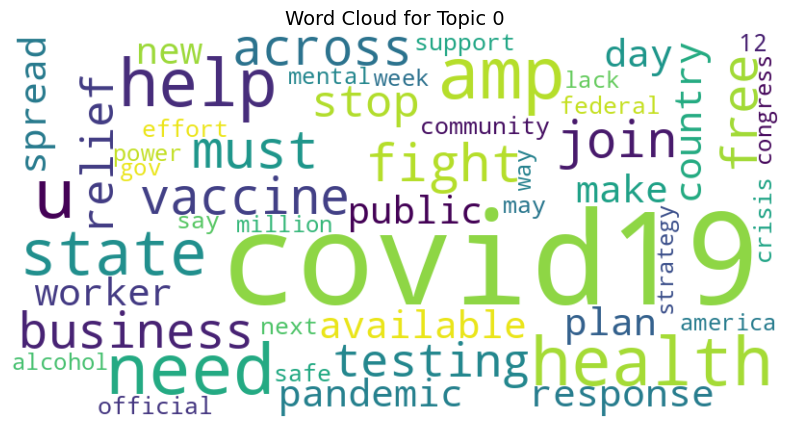

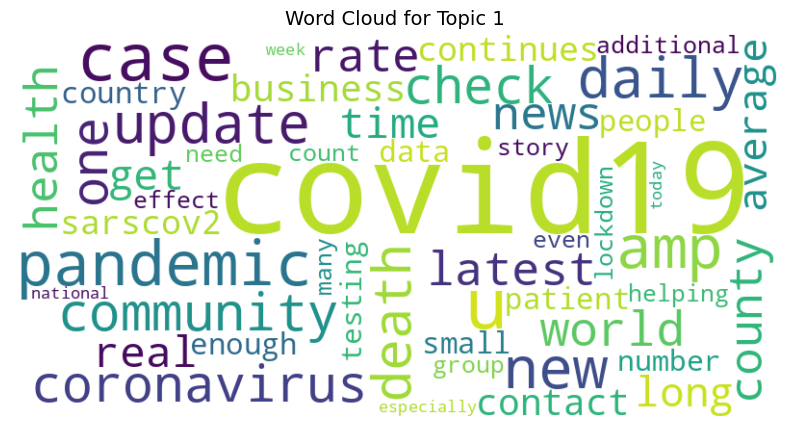

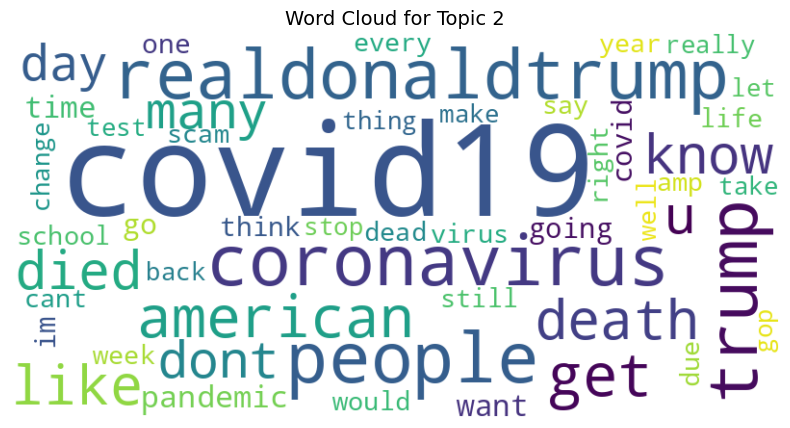

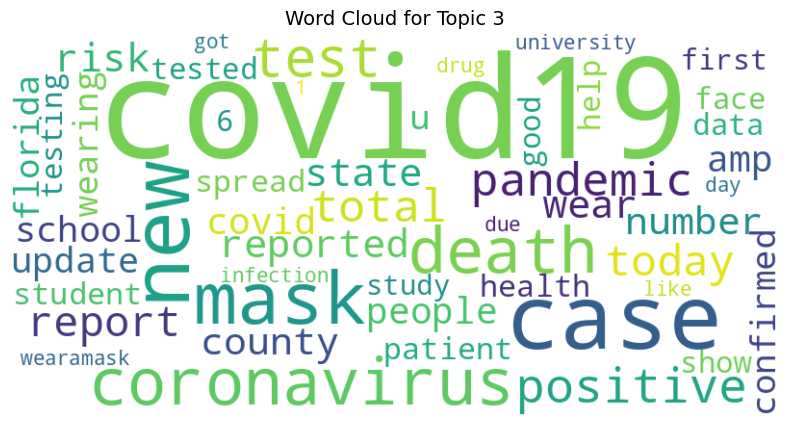

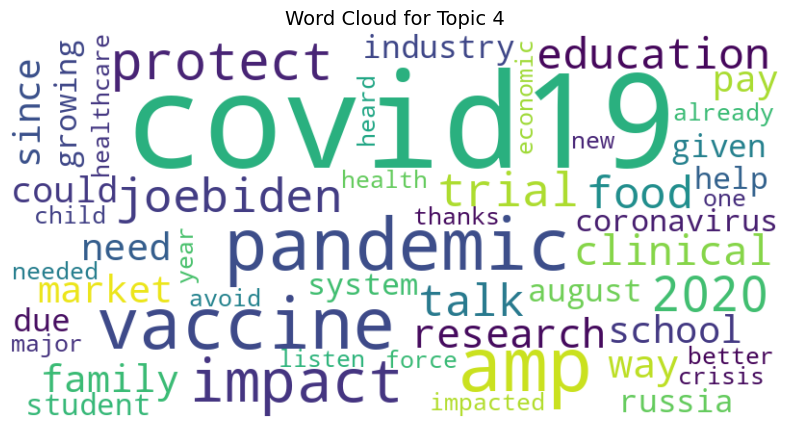

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to generate word cloud for a given topic
def generate_wordcloud_for_topic(topic_num, lda_model):
    # Get the word probabilities for the specified topic
    topic_words = lda_model.show_topic(topic_num, topn=50)

    # Create a dictionary of word frequencies
    word_freq = {word: prob for word, prob in topic_words}

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Topic {topic_num}", fontsize=14)
    plt.show()

# Assuming you have 5 topics (adjust as per your LDA model)
num_topics = 5

# Generate word clouds for each topic
for topic_id in range(num_topics):
    generate_wordcloud_for_topic(topic_id, lda_model)

**Sentiment Analysis**

In [ ]:
from textblob import TextBlob

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-14-e51ae35eb91c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid19_tweets['sentiment'] = sentiments


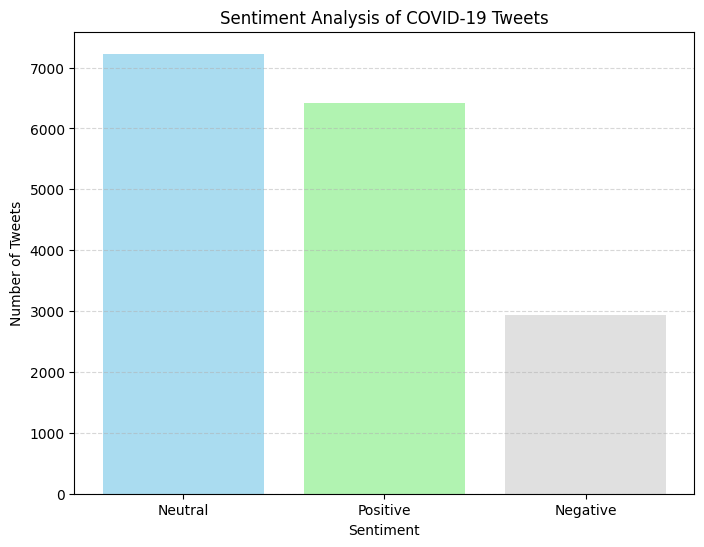

In [ ]:
# Perform sentiment analysis on each tweet and assign sentiment labels
sentiments = []
for tweet in covid19_tweets['text']:
    # Convert NaN values to empty string
    if pd.isnull(tweet):
        tweet = ''
    analysis = TextBlob(str(tweet))  # Convert to string
    sentiment = analysis.sentiment.polarity
    if sentiment > 0:
        sentiment_label = 'Positive'
    elif sentiment < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    sentiments.append(sentiment_label)

# Add sentiment labels to the DataFrame
covid19_tweets['sentiment'] = sentiments

# Visualize sentiment distribution
sentiment_counts = covid19_tweets['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['#87CEEB', '#90EE90', '#D3D3D3'], alpha=0.7)
plt.title('Sentiment Analysis of COVID-19 Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


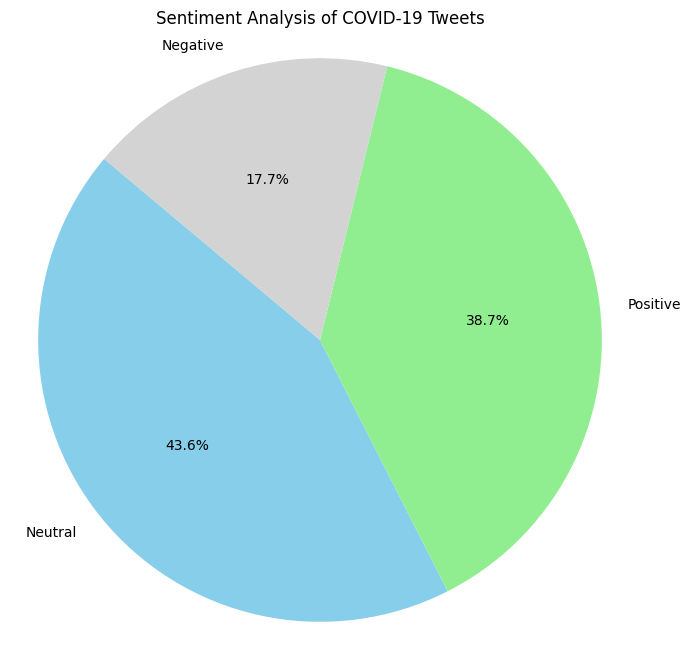

In [ ]:
# Plot sentiment distribution using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['#87CEEB', '#90EE90', '#D3D3D3'], startangle=140)
plt.title('Sentiment Analysis of COVID-19 Tweets')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

**Geospatial Analysis**

In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
from collections import Counter

# Extract time zone information from the 'user_location' column
covid19_tweets['user_location'] = covid19_tweets['user_location'].str.split(',').str[-1].str.strip()

# Count the number of tweets for each location
location_counts = Counter(covid19_tweets['user_location'])
location_counts

# Get the top 20 locations with the most tweets
top_20_locations = location_counts.most_common(20)
print(top_20_locations)

[(nan, 656), ('USA', 253), ('United States', 164), ('CA', 59), ('Canada', 51), ('NY', 38), ('FL', 29), ('TX', 27), ('Ontario', 20), ('Earth', 20), ('IL', 18), ('WA', 14), ('MI', 13), ('PA', 13), ('MN', 13), ('MA', 13), ('Florida', 12), ('Paris', 12), ('Australia', 11), ('California', 11)]


In [ ]:
# Initialize the Nominatim geocoder
geolocator = Nominatim(user_agent="covid19_heatmap")

# Create a list of latitude and longitude coordinates for each location
heat_data = []
for location, count in top_20_locations:
    try:
        location_info = geolocator.geocode(location)
        if location_info:
            heat_data.append([location_info.latitude, location_info.longitude, count])
    except:
        pass

# Create a Folium map centered at (0, 0)
m = folium.Map(location=[0, 0], zoom_start=2)

# Add heatmap layer
HeatMap(heat_data, radius=15).add_to(m)

# Display the map
m

NameError: name 'Nominatim' is not defined

In [ ]:
import matplotlib.pyplot as plt

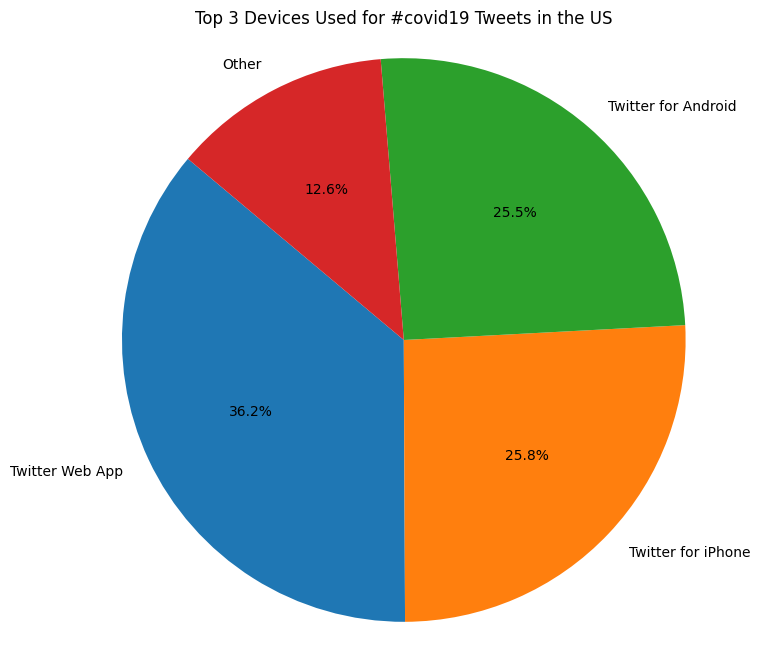

In [ ]:
# Count occurrences of each device
device_counts = covid19_tweets['source'].value_counts()

# Select top 3 devices and aggregate the rest into 'Other'
top_devices = device_counts.nlargest(3)
other_devices = device_counts[~device_counts.index.isin(top_devices.index)].sum()
top_devices['Other'] = other_devices

# Plot the Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(top_devices, labels=top_devices.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 3 Devices Used for #covid19 Tweets in the US')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Trend Analysis in #covid19 in the US**

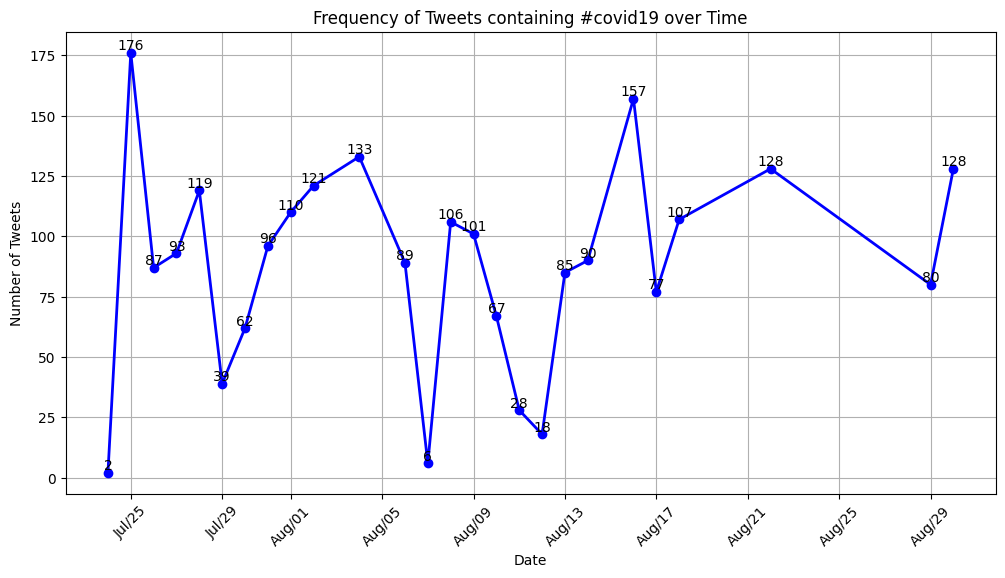

          Date  Tweets
0   2020-07-24       2
1   2020-07-25     176
2   2020-07-26      87
3   2020-07-27      93
4   2020-07-28     119
5   2020-07-29      39
6   2020-07-30      62
7   2020-07-31      96
8   2020-08-01     110
9   2020-08-02     121
10  2020-08-04     133
11  2020-08-06      89
12  2020-08-07       6
13  2020-08-08     106
14  2020-08-09     101
15  2020-08-10      67
16  2020-08-11      28
17  2020-08-12      18
18  2020-08-13      85
19  2020-08-14      90
20  2020-08-16     157
21  2020-08-17      77
22  2020-08-18     107
23  2020-08-22     128
24  2020-08-29      80
25  2020-08-30     128


In [ ]:
# Convert the 'date' column to datetime format
covid19_tweets['date'] = pd.to_datetime(covid19_tweets['date'])

# Group tweets by date and count frequency of tweets for each date
tweet_frequency_over_time = covid19_tweets.groupby(covid19_tweets['date'].dt.date).size()

# Convert series to DataFrame
df_tweet_frequency = pd.DataFrame({'Date': tweet_frequency_over_time.index, 'Tweets': tweet_frequency_over_time.values})

# Visualize the trend using a time series chart
plt.figure(figsize=(12, 6))
plt.plot(df_tweet_frequency['Date'], df_tweet_frequency['Tweets'], marker='o', color='b', linewidth=2)

# Add data point values
for x, y in zip(df_tweet_frequency['Date'], df_tweet_frequency['Tweets']):
    plt.text(x, y, f'{y}', ha='center', va='bottom')

plt.title('Frequency of Tweets containing #covid19 over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b/%d'))  # Format x-axis labels
plt.grid(True)
plt.show()

# Print DataFrame
print(df_tweet_frequency)